# 百分等级(Percentile Rank)
- 标准化考试成绩
    - 原始分数 (Score)
    - 百分等级 (percentile rank)
        - Percentage (比例) = (原始成绩<你的成绩)中人数所占的比例
        - Percentile rank = Percentage * 100
- 90百分位数：比90%的人成绩好

# 累积分布函数(Cumulative Distribution Function)
- 累积分布函数 (CDF)
- 值到其在分布中百分等级的映射
- CDF(x)
    - x是分布中的某个值
    - CDF(X)样本中小于等于x的值的比例

# ECDF
ECDF: Empirical CDF
- 基于经验观察
- 样本数量有限


In [4]:
import numpy as np

def ecdf(data):
    x = np.sort(data)
    n = len(x)
    y = np.arange(1, n+1)/n
    
    return x, y


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# 读取数据
df = pd.read_csv('../data/iris.csv')

# 获取virginica类别的数据
virginica = df.loc[df['species'] == 'virginica']

virginica.head()

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica


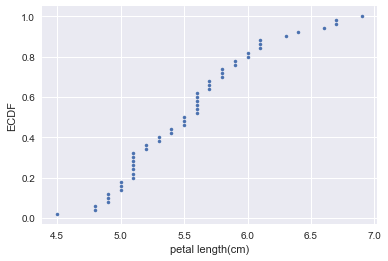

In [8]:
x, y = ecdf(virginica['petal_length'])

_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('petal length(cm)')
_ = plt.ylabel('ECDF')
plt.show()

In [9]:
print('virginica sepal length mean:', np.mean(virginica['petal_length']))

virginica sepal length mean: 5.5520000000000005


# 问题
如果再测量50组数据，花瓣长度均值还会是5.552吗？

# Hacker Statistics
- Python
- 仿真数据

# 贝努利试验
实验结果只有两种情况：True/False


In [10]:
import numpy as np

np.random.seed(42)

# 模拟四次抛硬币试验
random_numbers = np.random.random(size=4)
print(random_numbers)

[0.37454012 0.95071431 0.73199394 0.59865848]


In [11]:
# 统计头像朝上的次数
heads = random_numbers < 0.5
print(heads)
print('正面次数：', np.sum(heads))

[ True False False False]
正面次数： 1


重复进行10000次贝努利试验，每次试验抛4次硬币，出现4次头像朝上的概率？

In [12]:
n_all_heads = 0

for _ in range(10000):
    random_numbers = np.random.random(size=4)
    heads = random_numbers < 0.5
    if np.sum(heads) == 4:
        n_all_heads += 1
        
print('四次头像朝上的概率:', n_all_heads/10000)

四次头像朝上的概率: 0.0619


# 练习1
完成函数`perform_bernoulli_trials`，其原型如下：
```
def perform_bernoulli_trials(n, p):
    """ 
    输入：执行n次Bernoulli试验，每次成功的概率为p
    返回值：成功次数
    """
```

参考上面抛硬币的例子，在上述抛硬币例子中n=10000, p=0.5而已。

In [29]:
def perform_bernoulli_trials(n, p):
    """
    输入：执行n次Bernoulli试验，每次成功的概率为p
    返回值：成功次数
    """
    n_success = 0
    
    # 补充你的代码.....
            
    return n_success

# 抵押贷款
银行有100个抵押贷款的案例，贷款违约的概率为p=0.05(5%)。在这个例子中其满足Bernoulli试验的特性：
1. 事件独立；
2. 结果只有两种：违约(default)和不违约；

于是我们可以使用上面完成的函数`perform_bernoulli_trials`来模拟(假设违约为True)，重复该仿真1000次，通过绘制概率质量函数，我们就可以清楚得知违约的概率。

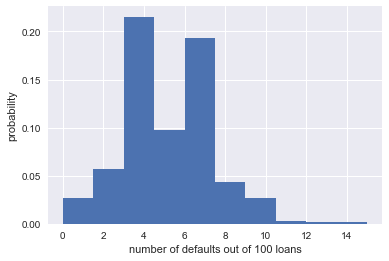

In [23]:
import numpy as np

# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)

# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, normed=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()


# 练习2
假设根据银行的精算师计算，如果违约人数超过10人的话，银行就有亏损。那么请基于上面的`抵押贷款`案例中`n_defaults`数据，
1. 计算银行亏钱的概率？
2. 绘制随机变量`n_defaults`的ECDF图。

提示：
1. 计算n_defaults大于10的事件数量；
2. 调用上节课完成的`ecdf`函数，得到`n_defaults`对应的x/y数据，使用plot函数绘制；

In [ ]:
# 练习2

# 二项分布 (Binomial Distribution)
**二项分布**就是重复n次独立的伯努利试验。在每次试验中只有两种可能的结果，而且两种结果发生与否互相对立，并且相互独立，与其它各次试验结果无关，事件发生与否的概率在每一次独立试验中都保持不变，则这一系列试验总称为n重伯努利实验，当试验次数为1时，二项分布服从0-1分布。

`numpy`也提供了`np.random.binomial`函数用于生成二项分布的样本数据。

In [25]:
import numpy as np

# n=60, p=0.1, 重复收集10000次数据
samples = np.random.binomial(60, 0.1, size=10000)

10000


# 练习3
绘制上面例子中`samples`数据的ECDF和PMF图。

提示：绘制PMF时，采用**bin edges**的方式，例如:
```
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5
_ = plt.hist(..., bins=bins, ...)
```


In [ ]:
# 练习3

# 泊松分布
泊松分布就是描述某段时间内，事件具体的发生概率。

$$P(N(t) = n) = \frac{(\lambda t)^n e^{-\lambda t}}{n!}$$
P 表示概率，N表示某种函数关系，t 表示时间，n 表示数量，1小时内出生3个婴儿的概率，就表示为 P(N(1) = 3) 。等号的右边，λ 表示事件的频率。

泊松分布是二项分布的一个特例。


In [28]:
# 获取10000个泊松分布的样本数据
samples_poisson = np.random.poisson(10, 10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# 指定二项分布的参数: n,p. np=10，也即和上述泊松分布的平均值相同
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]

# 对于n[]和p[]中每一对数据，进行10000个Bernoulli试验的数据
for i in range(3):
    samples_binomial = np.random.binomial(n[i], p[i],size=10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))

Poisson:      10.011 3.1676930091156246
n = 20 Binom: 10.0248 2.25742883830255
n = 100 Binom: 10.0437 2.990917971125253
n = 1000 Binom: 9.9928 3.149499668201284


# 练习4
美国职业棒球联赛中1990年和2015年是无安打(no-hitter)记录最多的赛季(7次)，假定平均每个赛季无安打平均次数为251/115，请问在一个赛季中超过7次无安打的概率是多少？

提示：
1. 利用`np.random.poisson()`产生泊松分布的数据；
2. 计算获取数据中值大于7的事件数量，并计算概率；

# 正态分布(Normal Distribution)

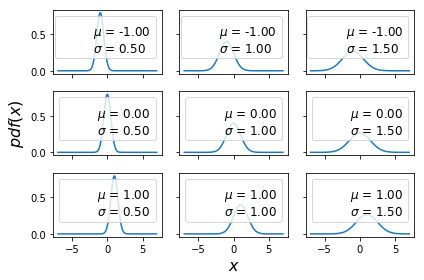

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

mu_params = [-1, 0, 1]
sd_params = [0.5, 1, 1.5]
x = np.linspace(-7, 7, 100)
f, ax = plt.subplots(len(mu_params), len(sd_params), sharex=True, sharey=True)
for i in range(3):
    for j in range(3):
        mu = mu_params[i]
        sd = sd_params[j]
        y = stats.norm(mu, sd).pdf(x)
        ax[i,j].plot(x, y)
        ax[i,j].plot(0, 0, 
        label="$\\mu$ = {:3.2f}\n$\\sigma$ = {:3.2f}".format (mu, sd), alpha=0)
        ax[i,j].legend(fontsize=12)
ax[2,1].set_xlabel('$x$', fontsize=16)
ax[1,0].set_ylabel('$pdf(x)$', fontsize=16)
plt.tight_layout()